In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df1 = pd.read_csv(r"/kaggle/input/stocks/fear_greed_index.csv")
df2 = pd.read_csv(r"/kaggle/input/stocks/historical_data.csv")

In [27]:
df1.head()

,timestamp,value,classification,date,trade_date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


In [23]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [19]:
df1["date"] = pd.to_datetime(df1["date"])

In [22]:
df2["Timestamp IST"] = pd.to_datetime(df2["Timestamp IST"], dayfirst=True)

In [26]:
df1["trade_date"] = df1["date"].dt.date
df2["trade_date"] = df2["Timestamp IST"].dt.date

In [28]:
df1_clean = df1[['trade_date', 'classification']]

In [29]:
df = pd.merge(
    df2,
    df1_clean,
    on='trade_date',
    how='left'
)

In [30]:
df.shape

(211224, 18)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [35]:
df = df.dropna(subset=["classification"])

In [39]:
# Average PnL
df.groupby("classification")["Closed PnL"].mean().sort_values(ascending=False)

classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64

In [40]:
# Win Rate
(df["Closed PnL"]>0).groupby(df["classification"]).mean().sort_values(ascending=False)

classification
Extreme Greed    0.464943
Fear             0.420768
Neutral          0.396991
Greed            0.384828
Extreme Fear     0.370607
Name: Closed PnL, dtype: float64

In [41]:
# Trade Size
df.groupby("classification")["Size USD"].mean()

classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64

In [42]:
# Fees (proxy for activity)
df.groupby("classification")["Fee"].mean()

classification
Extreme Fear     1.116291
Extreme Greed    0.675902
Fear             1.495172
Greed            1.254372
Neutral          1.044798
Name: Fee, dtype: float64

In [44]:
# Buy vs Sell Behavior
pd.crosstab(df["Side"], df["classification"], normalize="columns")

classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
Side,,,,,
BUY,0.510981,0.44859,0.489513,0.488559,0.503343
SELL,0.489019,0.55141,0.510487,0.511441,0.496657


In [45]:
# Trader-Level Intelligence
trader_perf = (
    df.groupby(["Account", "classification"])["Closed PnL"]
    .sum()
    .unstack()
)

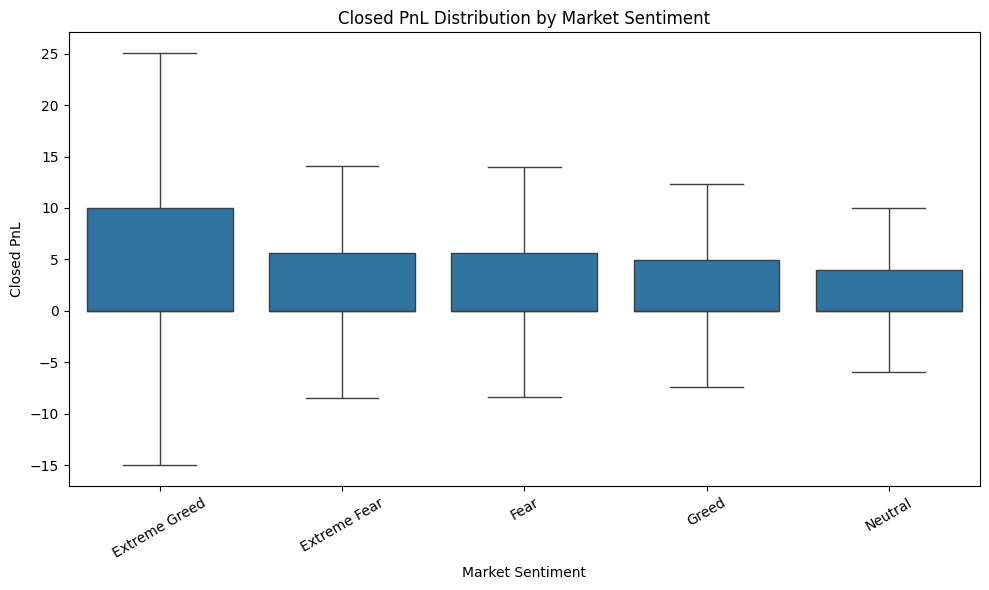

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="classification",
    y="Closed PnL",
    showfliers=False
)
plt.title("Closed PnL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


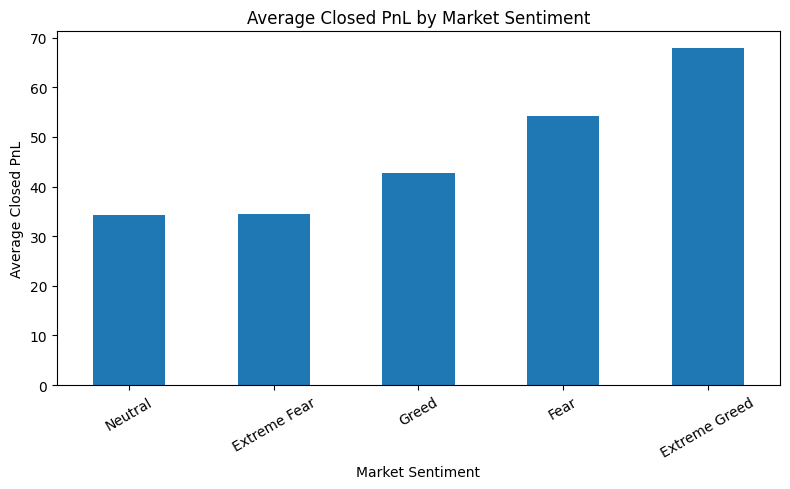

In [48]:
avg_pnl = df.groupby("classification")["Closed PnL"].mean().sort_values()

plt.figure(figsize=(8, 5))
avg_pnl.plot(kind="bar")
plt.title("Average Closed PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


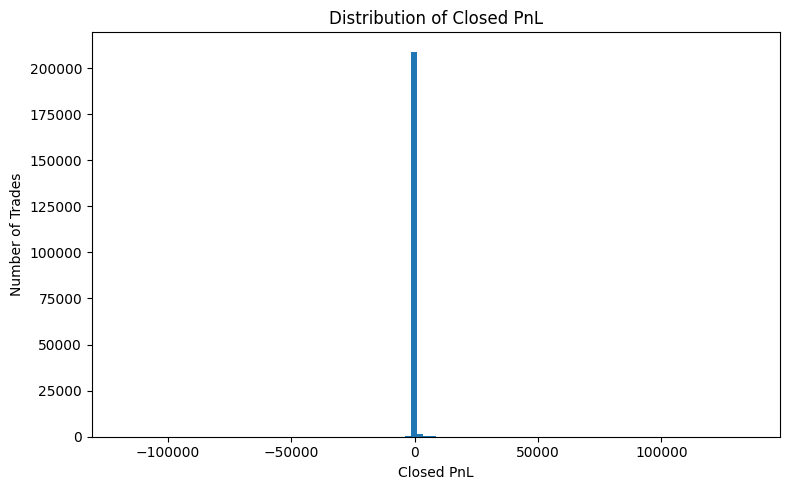

In [49]:
plt.figure(figsize=(8, 5))
plt.hist(df["Closed PnL"], bins=100)
plt.title("Distribution of Closed PnL")
plt.xlabel("Closed PnL")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.show()


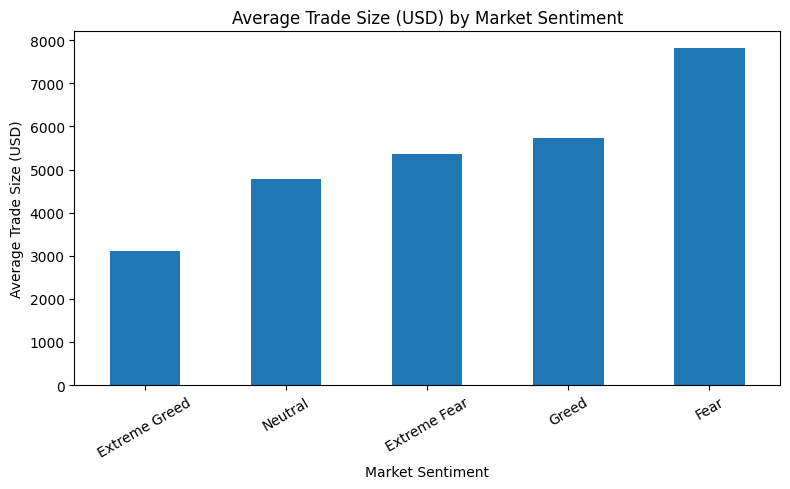

In [50]:
avg_size = df.groupby("classification")["Size USD"].mean().sort_values()

plt.figure(figsize=(8, 5))
avg_size.plot(kind="bar")
plt.title("Average Trade Size (USD) by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## Key Insights Summary

Trader behavior and performance vary significantly across market sentiment regimes.
While periods of **Extreme Greed** deliver the highest profitability and win rates,
they also exhibit signs of aggressive risk-taking. In contrast, **Fear** regimes show
larger position sizes and higher trading costs, suggesting defensive yet high-conviction
strategies. Overall, sentiment strongly influences risk appetite, trade sizing, and
execution behavior.


### Insights: Average Closed PnL

- **Extreme Greed** yields the highest average PnL, indicating strong directional
  conviction and momentum-driven trading.
- **Fear** regimes outperform normal **Greed**, suggesting that disciplined strategies
  during uncertainty may be more effective than emotional risk-taking.
- **Extreme Fear** and **Neutral** phases show the lowest profitability, likely due to
  reduced conviction and cautious participation.


### Insights: Trade Win Rate

- **Extreme Greed** has the highest win rate, reinforcing the idea that strong market
  momentum improves trade accuracy.
- **Fear** periods maintain a relatively high win rate, highlighting controlled and
  selective trade execution.
- Despite increased activity, **Greed** shows a lower win rate than Fear, suggesting
  overconfidence and suboptimal entries.
- **Extreme Fear** has the lowest win rate, reflecting uncertainty and defensive exits.


### Insights: Trade Size (USD)

- Traders take the **largest positions during Fear**, indicating high-conviction
  trades during perceived undervaluation.
- **Greed** and **Extreme Fear** exhibit moderate position sizing, balancing risk
  exposure with market uncertainty.
- **Extreme Greed** surprisingly shows smaller average trade sizes, suggesting
  increased frequency rather than larger bets.


### Insights: Trading Fees

- **Fear** periods incur the highest average fees, implying increased trade frequency
  or higher execution costs during volatile conditions.
- **Greed** also shows elevated fees, consistent with higher participation.
- **Extreme Greed** displays lower average fees, supporting the hypothesis of
  fewer but more directional trades.


### Insights: Buy vs Sell Behavior

- Buy and sell activity remains relatively balanced across all sentiment regimes,
  indicating market neutrality at the aggregate level.
- **Extreme Greed** shows a noticeable tilt toward selling, suggesting profit-taking
  behavior after strong price appreciation.
- **Fear** phases slightly favor selling, consistent with risk-off positioning
  and stop-loss driven exits.


### Insights: Trader-Level Performance

- Certain traders remain profitable across both Fear and Greed regimes, indicating
  sentiment-agnostic or adaptive strategies.
- A subset of traders performs well only during **Greed**, suggesting momentum-based
  approaches.
- Traders who consistently lose during **Fear** tend to show larger drawdowns,
  highlighting weak risk management under stress.
- Segmenting traders by sentiment performance can help identify robust versus
  regime-dependent strategies.


### Insights: PnL Distribution by Sentiment

- **Greed and Extreme Greed** show wider PnL distributions, reflecting higher volatility
  and risk-seeking behavior.
- **Fear** regimes exhibit tighter distributions, indicating controlled losses and
  cautious trade management.
- Extreme outcomes are more frequent during Greed, reinforcing the risk-reward trade-off.


### Insights: Overall PnL Distribution

- The PnL distribution is right-skewed, with frequent small gains and occasional
  large losses.
- This suggests traders prioritize consistent profits while accepting tail-risk losses.
- Risk management strategies could focus on limiting downside tail events.


### Combined Insight: Profitability vs Risk

- Higher profitability during **Extreme Greed** does not always correlate with larger
  trade sizes, indicating confidence rather than leverage-driven gains.
- **Fear** regimes combine larger position sizes with controlled outcomes, suggesting
  strategic accumulation rather than speculative trading.


## Conclusion

Market sentiment plays a critical role in shaping trader behavior. While Greed-driven
markets offer higher profitability, they also introduce significant volatility and
risk. Fear-based trading, though less lucrative, demonstrates stronger discipline and
risk control. These findings highlight the importance of sentiment-aware trading
strategies and adaptive risk management in crypto markets.
